## Training the Perceptron

### Perceptron Trick

In [1]:
from sklearn.datasets import make_classification
import numpy as np 

In [5]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [6]:
import matplotlib.pyplot as plt 

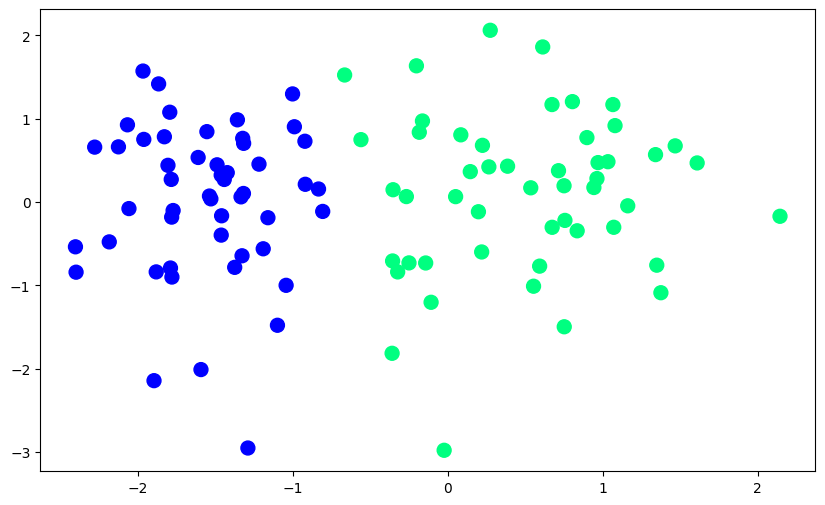

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)


In [9]:
# defining the step function
def step(z):
    return 1 if z>0 else 0

In [14]:
#defining the perceptron function
def perceptron(x,y):
    #inserting bias - 1 at every row at 0th position
    x = np.insert(x,0,1,axis=1)
    #initialising weights array with 1 of the shape of columns in x
    weights = np.ones(x.shape[1])
    #defining learning rate 
    learning_rate = 0.1

    for i in range(1000):
        #selecting a random int from the size of x
        j = np.random.randint(1,100)
        #calculating the output of the perceptron
        y_hat = step(np.dot(weights,x[j]))
        #calculating the new weights 
        weights = weights + learning_rate*(y[j]-y_hat)*x[j]

    return weights[0], weights[1:]


In [15]:
intercept_,coef_ = perceptron(x,y)

In [16]:
print(intercept_)
print(coef_)

0.9
[1.33065582 0.10423741]


In [22]:
# calculating m and b of the line 
# converting line Ax + By + c =0 into y = mx+b 
# m = -A/B  c = -C/B 


m = -(coef_[0] / coef_[1])
b = -(intercept_/coef_[1])


In [18]:

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

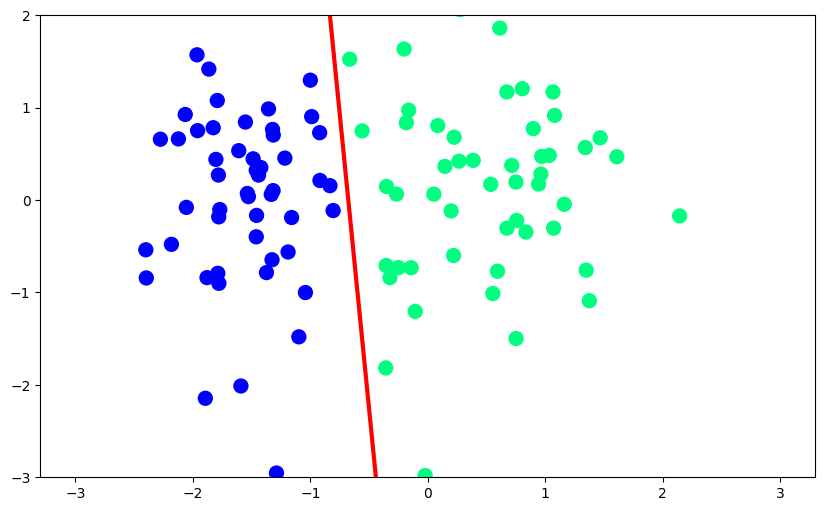

In [21]:
#plotting the line 
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)